In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen=ImageDataGenerator(
    rotation_range=40,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2,
    fill_mode='nearest'
)
train_data=train_gen.flow_from_directory(
    directory='/content/drive/MyDrive/PlantVillageDataset',
    batch_size=32,
    target_size=(224,224),
    class_mode='categorical',
    subset='training'
)
val_data=train_gen.flow_from_directory(
    directory='/content/drive/MyDrive/PlantVillageDataset',
    batch_size=32,
    target_size=(224,224),
    class_mode='categorical',
    subset='validation'
)


Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.trainable=False

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │          75,267 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 521s 9s/step - accuracy: 0.6177 - loss: 1.1724 - val_accuracy: 0.8349 - val_loss: 0.4000
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 76s 579ms/step - accuracy: 0.8628 - loss: 0.3527 - val_accuracy: 0.8488 - val_loss: 0.3360
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 629ms/step - accuracy: 0.8779 - loss: 0.3169 - val_accuracy: 0.8953 - val_loss: 0.2651
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 598ms/step - accuracy: 0.9078 - loss: 0.2437 - val_accuracy: 0.8558 - val_loss: 0.3282
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 604ms/step - accuracy: 0.9003 - loss: 0.2540 - val_accuracy: 0.8581 - val_loss: 0.3725
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 600ms/step - accuracy: 0.9102 - loss: 0.2409 - val_accuracy: 0.9186 - val_loss: 0.2104
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 594ms/step - accuracy: 0.9291 - loss: 0.1944 - val_accuracy: 0.8977 - val_loss: 0.2583
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 566ms/step - accuracy: 0.9176 - loss: 0.2214 - val_accuracy: 0.8837 

In [ ]:
import os

In [ ]:
len(os.listdir('/content/drive/MyDrive/PlantVillageDataset'))

3

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

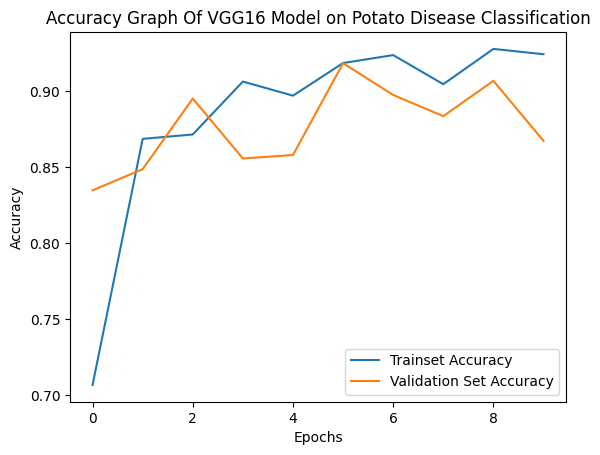

In [ ]:
plt.plot(history.history['accuracy'],label="Trainset Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Set Accuracy")
plt.title("Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()